<a href="https://colab.research.google.com/github/virtualspark/YCNG232-NLP_Fundamentals/blob/main/Reflexion_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
# install.packages("janeaustenr")
# install.packages("tidytext")

NULL


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%%R
steam_dataset <- read.csv('/content/drive/My Drive/NLP/Week2/steam_games.csv')

In [5]:
%%R
# head(steam_dataset)

NULL


In [6]:
%%R
str(steam_dataset)

'data.frame':	40833 obs. of  20 variables:
 $ url                     : chr  "https://store.steampowered.com/app/379720/DOOM/" "https://store.steampowered.com/app/578080/PLAYERUNKNOWNS_BATTLEGROUNDS/" "https://store.steampowered.com/app/637090/BATTLETECH/" "https://store.steampowered.com/app/221100/DayZ/" ...
 $ types                   : chr  "app" "app" "app" "app" ...
 $ name                    : chr  "DOOM" "PLAYERUNKNOWN'S BATTLEGROUNDS" "BATTLETECH" "DayZ" ...
 $ desc_snippet            : chr  "Now includes all three premium DLC packs (Unto the Evil, Hell Followed, and Bloodfall), maps, modes, and weapon"| __truncated__ "PLAYERUNKNOWN'S BATTLEGROUNDS is a battle royale shooter that pits 100 players against each other in a struggle"| __truncated__ "Take command of your own mercenary outfit of 'Mechs and the MechWarriors that pilot them, struggling to stay af"| __truncated__ "The post-soviet country of Chernarus is struck by an unknown virus, turning the majority population into fre

In [7]:
%%R
library(dplyr)

steam_dataset_reviews <- steam_dataset %>% select(c('name', 'desc_snippet'))

Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union




In [8]:
%%R
head(steam_dataset_reviews)

                                        name
1                                       DOOM
2              PLAYERUNKNOWN'S BATTLEGROUNDS
3                                 BATTLETECH
4                                       DayZ
5                                 EVE Online
6 Grand Theft Auto V: Premium Online Edition
                                                                                                                                                                                                                                                                                                                 desc_snippet
1                   Now includes all three premium DLC packs (Unto the Evil, Hell Followed, and Bloodfall), maps, modes, and weapons, as well as all feature updates including Arcade Mode, Photo Mode, and the latest Update 6.66, which brings further multiplayer improvements as well as revamps multiplayer progression.
2                                                

In [9]:
%%R
library(dplyr)
library(tidytext)

# For this exercise, we will use steam video games data (more precisely analysing words in the description (desc_snippet) of the games)

# Count words of the descriptions by games
steam_wb <- steam_dataset_reviews %>% unnest_tokens(word, desc_snippet) %>% count(name, word, sort = TRUE) %>% ungroup()
head(steam_wb)

                             name word  n
1      幽铃兰-lily of the hollow-   的 14
2                             NaN  nan 12
3 Save Halloween: City of Witches  the 12
4                     Alchemyland  the 11
5             Awakening of Dragon   龙 11
6         Command: Shifting Sands  the 11


In [10]:
%%R
head(steam_wb)

                             name word  n
1      幽铃兰-lily of the hollow-   的 14
2                             NaN  nan 12
3 Save Halloween: City of Witches  the 12
4                     Alchemyland  the 11
5             Awakening of Dragon   龙 11
6         Command: Shifting Sands  the 11


In [11]:
%%R
# Count the total words frequency of the games
steam_tw <- steam_wb %>% group_by(name) %>% summarize(total = sum(n))

In [12]:
%%R
head(steam_tw)

# A tibble: 6 × 2
  name                                                  total
  <chr>                                                 <int>
1 - Arcane Raise -                                         43
2 -KLAUS-                                                  48
3 ::CallBack                                               43
4 .hack//G.U. Last Recode                                  33
5 .projekt                                                  9
6 .T.E.S.T: Expected Behaviour — Sci-Fi 3D Puzzle Quest    36


In [13]:
%%R
# Combining the by-games frequencies with the total frequencies
steam_full_table <- left_join(steam_wb, steam_tw)
head(steam_full_table)

Joining, by = "name"
                             name word  n total
1      幽铃兰-lily of the hollow-   的 14   118
2                             NaN  nan 12    12
3 Save Halloween: City of Witches  the 12    57
4                     Alchemyland  the 11    55
5             Awakening of Dragon   龙 11    95
6         Command: Shifting Sands  the 11    55


In [14]:
# Question 1 - Distribution of lengths of words and visualization of the distribution

In [15]:
%%R
library(stringr)

In [16]:
%%R
# Calculate the word lengths
steam_full_table$word_length = str_length(steam_full_table$word)

In [17]:
%%R
head(steam_full_table,10)

                                       name word  n total word_length
1                幽铃兰-lily of the hollow-   的 14   118           1
2                                       NaN  nan 12    12           3
3           Save Halloween: City of Witches  the 12    57           3
4                               Alchemyland  the 11    55           3
5                       Awakening of Dragon   龙 11    95           1
6                   Command: Shifting Sands  the 11    55           3
7  Escalation - A Rainbow Six: Siege series  the 11    62           3
8                                UMA-War VR  the 11    60           3
9                          地铁：恐怖末班车  the 11    54           3
10     天罡星宿海 The sea of TianGang XinSu  the 11    62           3


In [18]:
%%R
# Count of the frequency of the word lengths
steam_lf <- steam_full_table %>% count(name, word_length, sort = TRUE) %>% ungroup()

In [19]:
%%R
head(steam_lf, 10)

                                               name word_length  n
1  Three Kingdoms：Ancient battlefield | 三国古战略           2 87
2                                          安全教育           2 70
3                胜利即正义! / Victory is justice！           2 61
4                                            VRLife           2 60
5  Three Kingdoms：Ancient battlefield | 三国古战略           1 56
6                        幽铃兰-lily of the hollow-           2 55
7                                        墨色三国志           2 54
8                   赫炎的印加诺克 Fullvoice ReBORN           2 46
9                        幽铃兰-lily of the hollow-           1 42
10                                    异霊 皓月空华           2 41


In [20]:
%%R
# Calculate the word_length * number of frequency
steam_lf$word_total_length <- steam_lf$word_length * steam_lf$n

In [21]:
%%R
head(steam_lf,20)

                                               name word_length  n
1  Three Kingdoms：Ancient battlefield | 三国古战略           2 87
2                                          安全教育           2 70
3                胜利即正义! / Victory is justice！           2 61
4                                            VRLife           2 60
5  Three Kingdoms：Ancient battlefield | 三国古战略           1 56
6                        幽铃兰-lily of the hollow-           2 55
7                                        墨色三国志           2 54
8                   赫炎的印加诺克 Fullvoice ReBORN           2 46
9                        幽铃兰-lily of the hollow-           1 42
10                                    异霊 皓月空华           2 41
11                       死亡投票_Death Voting Game           2 41
12                                Xiu's SuperMarket           2 40
13                              古剑奇谭二(GuJian2)           1 40
14                               城堡传说：魔王觉醒           2 40
15                                   Fisher Fans VR        

In [22]:
%%R
# Count the total length of all words of the games
steam_tl <- steam_lf %>% group_by(name) %>% summarize(total = sum(word_total_length))

In [23]:
%%R
steam_full_table_word_length <- left_join(steam_lf, steam_tl)
head(steam_full_table_word_length)

Joining, by = "name"
                                              name word_length  n
1 Three Kingdoms：Ancient battlefield | 三国古战略           2 87
2                                         安全教育           2 70
3               胜利即正义! / Victory is justice！           2 61
4                                           VRLife           2 60
5 Three Kingdoms：Ancient battlefield | 三国古战略           1 56
6                       幽铃兰-lily of the hollow-           2 55
  word_total_length total
1               174   237
2               140   172
3               122   161
4               120   171
5                56   237
6               110   159


In [24]:
%%R
library(dplyr)
target <- c("DOOM", "BATTLETECH", "Command: Shifting Sands", "EVE Online", "DayZ")
steam_full_table_word_length_1 <- filter(steam_full_table_word_length, name %in% target)

In [25]:
%%R
head(steam_full_table_word_length_1)

                     name word_length n word_total_length total
1 Command: Shifting Sands           3 9                27   207
2 Command: Shifting Sands           4 8                32   207
3                    DayZ           3 8                24   231
4              BATTLETECH           4 7                28   146
5                    DOOM           4 7                28   204
6              EVE Online           3 7                21   210


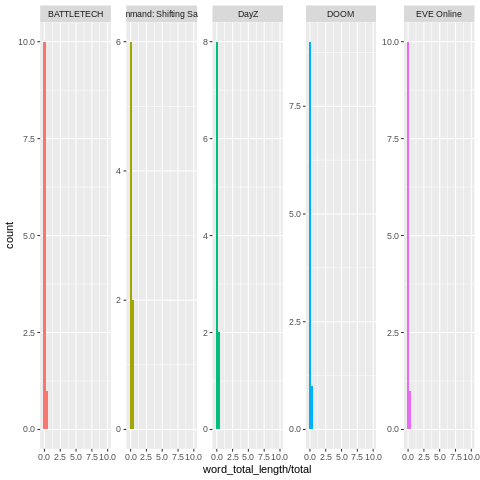

In [26]:
%%R
library(ggplot2)
library(repr)
options(repr.plot.width = 20, repr.plot.height = 4) # a wider, shorter figure
# these will all be heavy-tailed distributions (as predicted by Zipf's Law)
ggplot(steam_full_table_word_length_1, aes(word_total_length / total, fill = name)) + geom_histogram(show.legend = FALSE) + xlim(NA, 10) + facet_wrap(~name, ncol = 5, scales = "free_y")

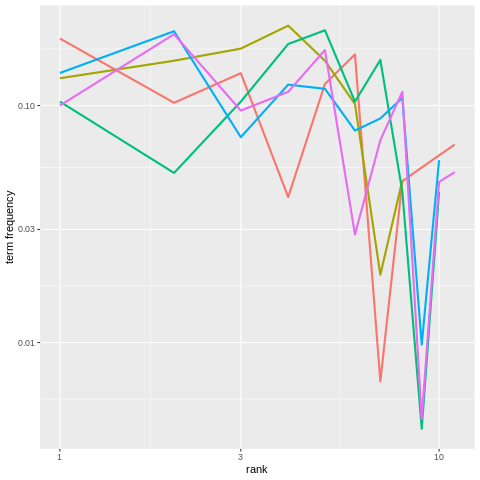

In [27]:
%%R
# this means they make sort of a straight line in a log-log plot (with noise at the start and at the end)
steam_fr <- steam_full_table_word_length_1 %>% group_by(name) %>% mutate(rank = row_number(), `term frequency` = word_total_length / total) # rank the total lengths by frequency
steam_fr %>% ggplot(aes(rank, `term frequency`, color = name)) + geom_line(size = 1, alpha = 1, show.legend = FALSE) + scale_x_log10() + scale_y_log10()

In [28]:
%%R
library(dplyr)
target <- c("DOOM", "BATTLETECH", "Command: Shifting Sands", "EVE Online", "DayZ")
steam_full_table_1 <- filter(steam_full_table, name %in% target)

In [29]:
%%R
steam_full_table_1 <- steam_full_table_1 %>% bind_tf_idf(word, name, n) # add three new columns: tf, idf, and tf_idf
ordered <- steam_full_table_1 %>% arrange(desc(tf_idf)) # put the highest tf_idf terms first
head(ordered,20)

         name         word n total word_length         tf       idf     tf_idf
1        DOOM           as 4    45           2 0.08888889 0.9162907 0.08144807
2        DOOM         mode 2    45           4 0.04444444 1.6094379 0.07153057
3        DOOM  multiplayer 2    45          11 0.04444444 1.6094379 0.07153057
4        DOOM         well 2    45           4 0.04444444 1.6094379 0.07153057
5        DayZ        virus 2    53           5 0.03773585 1.6094379 0.06073351
6  BATTLETECH       afloat 1    30           6 0.03333333 1.6094379 0.05364793
7  BATTLETECH       brutal 1    30           6 0.03333333 1.6094379 0.05364793
8  BATTLETECH        civil 1    30           5 0.03333333 1.6094379 0.05364793
9  BATTLETECH      command 1    30           7 0.03333333 1.6094379 0.05364793
10 BATTLETECH        drawn 1    30           5 0.03333333 1.6094379 0.05364793
11 BATTLETECH         find 1    30           4 0.03333333 1.6094379 0.05364793
12 BATTLETECH interstellar 1    30          12 0.033

In [30]:
# Question 2 - Distribution of tf-idf

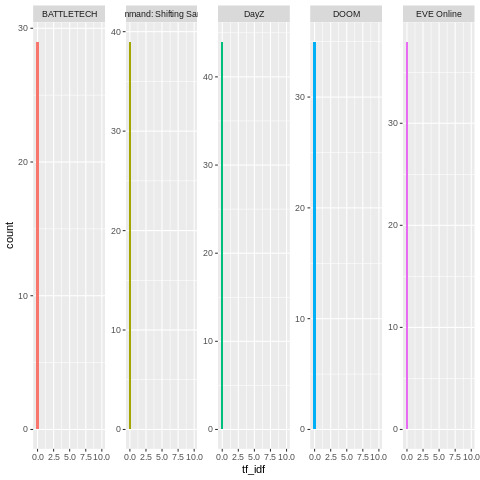

In [31]:
%%R
ggplot(ordered, aes(tf_idf, fill = name)) + geom_histogram(show.legend = FALSE) + xlim(NA, 10) + facet_wrap(~name, ncol = 5, scales = "free_y")

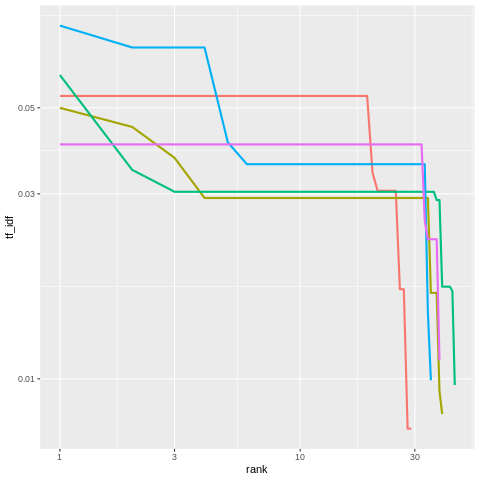

In [32]:
%%R
# this means they make sort of a straight line in a log-log plot (with noise at the start and at the end)
steam_ft <- ordered %>% group_by(name) %>% mutate(rank = row_number(), `tf_idf` = tf_idf) # rank the tf-idf
steam_ft %>% ggplot(aes(rank, `tf_idf`, color = name)) + geom_line(size = 1, alpha = 1, show.legend = FALSE) + scale_x_log10() + scale_y_log10()

In [33]:
%%R
# install.packages("tm")
# install.packages("widyr")

NULL


In [34]:
# Question 3 - Similarity measure for documents based on tf-idf matrix

In [35]:
# Method 

In [36]:
%%R
# closest games to each other
library(widyr)
closest_documents <- ordered %>%
  pairwise_similarity(name, word, n) %>%
  arrange(desc(similarity))

In [37]:
%%R
closest_documents

# A tibble: 20 × 3
   item1                   item2                   similarity
   <chr>                   <chr>                        <dbl>
 1 Command: Shifting Sands DayZ                        0.490 
 2 DayZ                    Command: Shifting Sands     0.490 
 3 BATTLETECH              DayZ                        0.334 
 4 DayZ                    BATTLETECH                  0.334 
 5 Command: Shifting Sands BATTLETECH                  0.325 
 6 BATTLETECH              Command: Shifting Sands     0.325 
 7 Command: Shifting Sands DOOM                        0.258 
 8 DOOM                    Command: Shifting Sands     0.258 
 9 BATTLETECH              DOOM                        0.186 
10 DOOM                    BATTLETECH                  0.186 
11 EVE Online              BATTLETECH                  0.133 
12 BATTLETECH              EVE Online                  0.133 
13 EVE Online              DOOM                        0.106 
14 DOOM                    EVE Online              

In [38]:
# Casting dataframe to a DocumentTermMatrix

In [39]:
%%R
# let's first filter out the lower end of the tf-idf scores
threshold <- 0.0005
top_doc <- ordered %>% filter (tf_idf > threshold) 
doc_matrix <- top_doc %>% cast_dtm(name, word, tf_idf)
doc_matrix # see the stats

<<DocumentTermMatrix (documents: 5, terms: 163)>>
Non-/sparse entries: 185/630
Sparsity           : 77%
Maximal term length: 12
Weighting          : term frequency (tf)


In [40]:
%%R
doc_matrix_table <- tidy(doc_matrix)
head(doc_matrix_table,20)

# A tibble: 20 × 3
   document   term          count
   <chr>      <chr>         <dbl>
 1 DOOM       as           0.0814
 2 BATTLETECH as           0.0305
 3 DOOM       mode         0.0715
 4 DOOM       multiplayer  0.0715
 5 DOOM       well         0.0715
 6 DayZ       virus        0.0607
 7 BATTLETECH afloat       0.0536
 8 BATTLETECH brutal       0.0536
 9 BATTLETECH civil        0.0536
10 BATTLETECH command      0.0536
11 BATTLETECH drawn        0.0536
12 BATTLETECH find         0.0536
13 BATTLETECH interstellar 0.0536
14 BATTLETECH mechs        0.0536
15 BATTLETECH mechwarriors 0.0536
16 BATTLETECH mercenary    0.0536
17 BATTLETECH outfit       0.0536
18 BATTLETECH pilot        0.0536
19 BATTLETECH stay         0.0536
20 BATTLETECH struggling   0.0536


In [41]:
# Question 4 - Similarity measure for terms based on tf-idf matrix

In [42]:
%%R
# closest words to each other
library(widyr)
closest_words <- ordered %>%
  pairwise_similarity(word, name, n) %>%
  arrange(desc(similarity))

In [43]:
%%R
head(filter(closest_words, similarity < 0.8), 20)

# A tibble: 20 × 3
   item1     item2 similarity
   <chr>     <chr>      <dbl>
 1 and       as         0.743
 2 as        and        0.743
 3 air       of         0.743
 4 arab      of         0.743
 5 attrition of         0.743
 6 battle    of         0.743
 7 bekaa     of         0.743
 8 conflicts of         0.743
 9 crisis    of         0.743
10 day       of         0.743
11 epic      of         0.743
12 guerilla  of         0.743
13 historic  of         0.743
14 history   of         0.743
15 israeli   of         0.743
16 kippur    of         0.743
17 lightning of         0.743
18 like      of         0.743
19 many      of         0.743
20 osirak    of         0.743


In [44]:
# Casting dataframe to a TermDocumentMatrix

In [45]:
%%R
# let's first filter out the lower end of the tf-idf scores
threshold <- 0.0005
top_term <- ordered %>% filter (tf_idf > threshold) 
term_matrix <- top_term %>% cast_tdm(word, name, tf_idf)
term_matrix # see the stats

<<TermDocumentMatrix (terms: 163, documents: 5)>>
Non-/sparse entries: 185/630
Sparsity           : 77%
Maximal term length: 12
Weighting          : term frequency (tf)


In [46]:
%%R
term_matrix_table <- tidy(term_matrix)
head(term_matrix_table,20)

# A tibble: 20 × 3
   term         document   count
   <chr>        <chr>      <dbl>
 1 as           DOOM     0.0814 
 2 mode         DOOM     0.0715 
 3 multiplayer  DOOM     0.0715 
 4 well         DOOM     0.0715 
 5 the          DOOM     0.00992
 6 all          DOOM     0.0407 
 7 6.66         DOOM     0.0358 
 8 arcade       DOOM     0.0358 
 9 bloodfall    DOOM     0.0358 
10 brings       DOOM     0.0358 
11 dlc          DOOM     0.0358 
12 evil         DOOM     0.0358 
13 feature      DOOM     0.0358 
14 followed     DOOM     0.0358 
15 further      DOOM     0.0358 
16 hell         DOOM     0.0358 
17 improvements DOOM     0.0358 
18 includes     DOOM     0.0358 
19 including    DOOM     0.0358 
20 latest       DOOM     0.0358 


In [47]:
%%R
#system2("sudo", "apt-get install libgsl0-dev") # on your own linux machine, you would use sudo apt-get install libgsl0-dev (please consider installing a Linux VM unless you already have access to a Linux machine)
#install.packages("topicmodels")
#install.packages("reshape")
#install.packages("reshape2")

NULL


In [48]:
%%R
head(top_doc[order(top_doc$tf_idf, decreasing = TRUE),],30)

                      name         word  n total word_length         tf
1                     DOOM           as  4    45           2 0.08888889
2                     DOOM         mode  2    45           4 0.04444444
3                     DOOM  multiplayer  2    45          11 0.04444444
4                     DOOM         well  2    45           4 0.04444444
5                     DayZ        virus  2    53           5 0.03773585
6               BATTLETECH       afloat  1    30           6 0.03333333
7               BATTLETECH       brutal  1    30           6 0.03333333
8               BATTLETECH        civil  1    30           5 0.03333333
9               BATTLETECH      command  1    30           7 0.03333333
10              BATTLETECH        drawn  1    30           5 0.03333333
11              BATTLETECH         find  1    30           4 0.03333333
12              BATTLETECH interstellar  1    30          12 0.03333333
13              BATTLETECH        mechs  1    30           5 0.0

In [49]:
%%R
library(topicmodels)
dtm <- top_doc %>% cast_dtm(name, word, n) # we start from the regular TDM
k <- 3 # how many topics are we expecting to detect (this could be tuned much like for k-means)
model <- LDA(dtm, k) 
topics <- tidy(model, matrix = "beta")
head(topics)

# A tibble: 6 × 3
  topic term       beta
  <int> <chr>     <dbl>
1     1 as    4.71e-  2
2     2 as    5.69e-172
3     3 as    1.20e-  2
4     1 mode  2.35e-  2
5     2 mode  7.01e-181
6     3 mode  1.84e-182


In [50]:
%%R
model

A LDA_VEM topic model with 3 topics.


In [51]:
# Calculate the number of tokens for each topic
%%R
tokens <- topics %>% count(topic , term , sort = TRUE) %>% ungroup()
head(tokens)

# A tibble: 6 × 3
  topic term       n
  <int> <chr>  <int>
1     1 6.66       1
2     1 a          1
3     1 afloat     1
4     1 air        1
5     1 all        1
6     1 among      1


In [52]:
%%R
total_tokens <- tokens %>% group_by(topic) %>% summarize(total = sum(n))
total_tokens

# A tibble: 3 × 2
  topic total
  <int> <int>
1     1   163
2     2   163
3     3   163


In [53]:
%%R
chapter_topics <- tidy(model, matrix = "beta")
chapter_topics

# A tibble: 489 × 3
   topic term             beta
   <int> <chr>           <dbl>
 1     1 as          4.71e-  2
 2     2 as          5.69e-172
 3     3 as          1.20e-  2
 4     1 mode        2.35e-  2
 5     2 mode        7.01e-181
 6     3 mode        1.84e-182
 7     1 multiplayer 2.35e-  2
 8     2 multiplayer 2.23e-179
 9     3 multiplayer 2.37e-182
10     1 well        2.35e-  2
# … with 479 more rows
# ℹ Use `print(n = ...)` to see more rows


In [54]:
%%R
top_terms <- chapter_topics %>%
  group_by(topic) %>%
  slice_max(beta, n = 5) %>% 
  ungroup() %>%
  arrange(topic, -beta)

top_terms

# A tibble: 54 × 3
   topic term          beta
   <int> <chr>        <dbl>
 1     1 and         0.0588
 2     1 as          0.0471
 3     1 mode        0.0235
 4     1 multiplayer 0.0235
 5     1 well        0.0235
 6     1 the         0.0235
 7     1 all         0.0235
 8     1 a           0.0235
 9     2 the         0.2   
10     2 of          0.0727
# … with 44 more rows
# ℹ Use `print(n = ...)` to see more rows


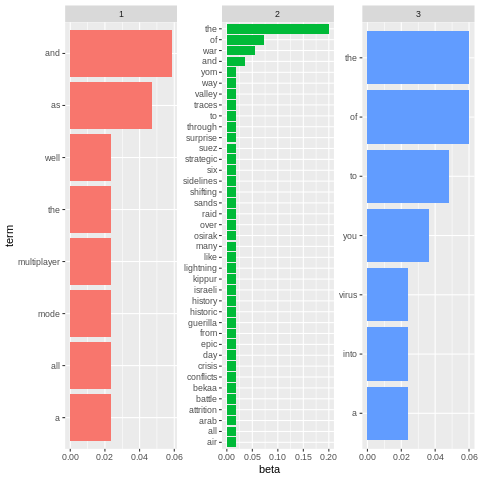

In [55]:
%%R
library(ggplot2)

top_terms %>%
  mutate(term = reorder_within(term, beta, topic)) %>%
  ggplot(aes(beta, term, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  scale_y_reordered()

In [56]:
%%R
chapters_gamma <- tidy(model, matrix = "gamma")
chapters_gamma

# A tibble: 15 × 3
   document                topic    gamma
   <chr>                   <int>    <dbl>
 1 DOOM                        1 0.999   
 2 DayZ                        1 0.000341
 3 BATTLETECH                  1 0.000603
 4 Command: Shifting Sands     1 0.000329
 5 EVE Online                  1 0.999   
 6 DOOM                        2 0.000402
 7 DayZ                        2 0.000341
 8 BATTLETECH                  2 0.000603
 9 Command: Shifting Sands     2 0.999   
10 EVE Online                  2 0.000452
11 DOOM                        3 0.000402
12 DayZ                        3 0.999   
13 BATTLETECH                  3 0.999   
14 Command: Shifting Sands     3 0.000329
15 EVE Online                  3 0.000452
